In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
plt.style.use('ggplot')

from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report

import glob, os



In [2]:
descriptor = CountVectorizer(stop_words='english')


In [3]:
descriptor.get_stop_words()

frozenset({'a',
           'about',
           'above',
           'across',
           'after',
           'afterwards',
           'again',
           'against',
           'all',
           'almost',
           'alone',
           'along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'around',
           'as',
           'at',
           'back',
           'be',
           'became',
           'because',
           'become',
           'becomes',
           'becoming',
           'been',
           'before',
           'beforehand',
           'behind',
           'being',
           'below',
           'beside',
           'besides'

# Ejercicio 1

In [4]:
os.getcwd()+ '/dump/*.csv'

'/Volumes/HDD/Documents/Desafio LATAM/Machine Learning/Semana 2 - Algoritmos de Clasificacion/dump/*.csv'

In [5]:
glob.glob(os.getcwd() + '/dump/*.csv') 


['/Volumes/HDD/Documents/Desafio LATAM/Machine Learning/Semana 2 - Algoritmos de Clasificacion/dump/public_enemy_scrape.csv',
 '/Volumes/HDD/Documents/Desafio LATAM/Machine Learning/Semana 2 - Algoritmos de Clasificacion/dump/mayhem_scrape.csv',
 '/Volumes/HDD/Documents/Desafio LATAM/Machine Learning/Semana 2 - Algoritmos de Clasificacion/dump/raekwon_scrape.csv',
 '/Volumes/HDD/Documents/Desafio LATAM/Machine Learning/Semana 2 - Algoritmos de Clasificacion/dump/immortal_scrape.csv',
 '/Volumes/HDD/Documents/Desafio LATAM/Machine Learning/Semana 2 - Algoritmos de Clasificacion/dump/kendrick_lamar_scrape.csv',
 '/Volumes/HDD/Documents/Desafio LATAM/Machine Learning/Semana 2 - Algoritmos de Clasificacion/dump/nicki_minaj_scrape.csv',
 '/Volumes/HDD/Documents/Desafio LATAM/Machine Learning/Semana 2 - Algoritmos de Clasificacion/dump/queen_scrape.csv',
 '/Volumes/HDD/Documents/Desafio LATAM/Machine Learning/Semana 2 - Algoritmos de Clasificacion/dump/radiohead_scrape.csv',
 '/Volumes/HDD/D

In [6]:
pd.read_csv('/Volumes/HDD/Documents/Desafio LATAM/Machine Learning/Semana 2 - Algoritmos de Clasificacion/dump/public_enemy_scrape.csv', index_col = None,
                     header = 0).head()

,Unnamed: 0,0,1,2,3
0,0,Public Enemy,hiphop,You're Gonna Get Yours,"(Flavor Flav) \n Oh-oh Chuck, they out to get ..."
1,1,Public Enemy,hiphop,Sophisticated Bitch,"That woman in the corner, cold playin' the rol..."
2,2,Public Enemy,hiphop,Miuzi Weighs A Ton,"Yo Chuck, run a power move on them \n (Yeah) \..."
3,3,Public Enemy,hiphop,Timebomb,"(Intro - Flavor Flav) \n Hey, Chuck, we got so..."
4,4,Public Enemy,hiphop,Too Much Posse,(Intro - Flavor Flav) \n What do you got to sa...


In [7]:
file_list = glob.glob(os.getcwd() + '/dump/*.csv') # Recuperar la lista con todos los .csv en la carpeta dump

append_csv = [] # Arreglo de pd.Dataframes
for f in file_list:
    append_csv.append(pd.read_csv(f, index_col = None,
                     header = 0).drop(columns = 'Unnamed: 0'))
df_lyrics = pd.concat(append_csv) # Concatenamos todos los datafrrames en uno solo
df_lyrics.columns = ['Artist', 'Genre', 'Song', 'Lyrics'] # Renombramos las columnas del nuevo dataframe

In [8]:
df_lyrics['Genre'].value_counts()

rock      4140
hiphop    2535
metal     1582
pop       1232
Name: Genre, dtype: int64

------
# Ejercicio 2

* Usar countplot
```python
sn.countplot(y = df['columna'],
            order = df['columna'].value_counts().index)
```

Al pedirle el atributo `index` a `value_counts()` podemos recuperar la lista de clases que obtiene 
`value_counts()`, el cual ordena de mayor a menor frecuencia.

In [9]:
#df_lyrics['sample'].value_counts()

In [10]:
print('Shape del dataframe de canciones:')
df_lyrics.shape

Shape del dataframe de canciones:


(9489, 4)

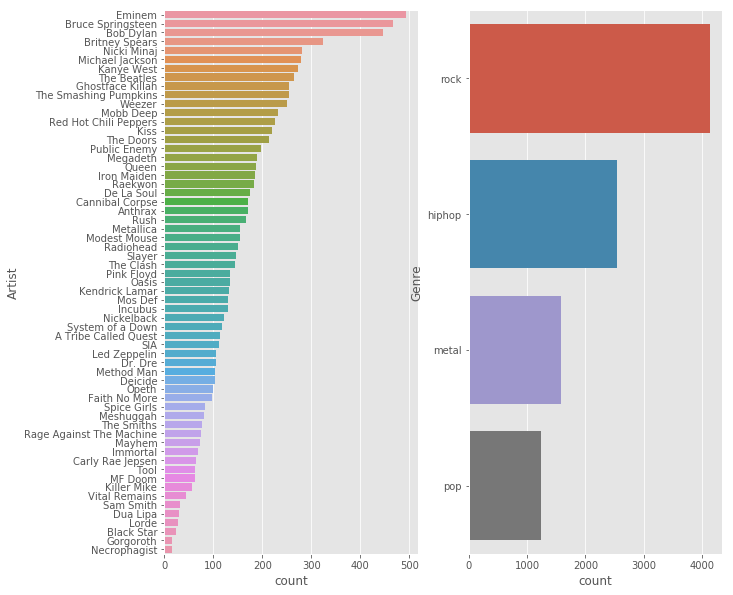

In [11]:
plt.figure(figsize = (10,10))

plt.subplot(1,2,1)
sn.countplot(y = df_lyrics['Artist'],
             order = df_lyrics['Artist'].value_counts().index)

plt.subplot(1,2,2)
sn.countplot(y = df_lyrics['Genre'],
             order = df_lyrics['Genre'].value_counts().index);


-----
# Ejercicio 3

```python
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(stop_words = 'english')

# Entrenamos el descriptor
count_vectorizer_fit = count_vectorizer.fit_transform(lista_de_textos)

# Extracción de atributos
words = count_vectorizer.get_feature_names()

# Extracción de la frecuencia de cada atributo
words_freq = count_vectorizer_fit.toarray().sum(axis = 0)
```

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(stop_words = 'english')

# Entrenamos el descriptor
count_vectorizer_fit = count_vectorizer.fit_transform(df_lyrics['Lyrics'])

# Extracción de atributos
words = count_vectorizer.get_feature_names()

# Extracción de la frecuencia de cada atributo
words_freq = count_vectorizer_fit.toarray().sum(axis = 0)

In [10]:
words_freq_df = pd.DataFrame([list(words), list(words_freq)]).T
words_freq_df.columns = ['words', 'freq']

In [11]:
words_freq_df.sample(20)

,words,freq
2966,axles,1
46396,versace,22
27191,mids,2
32425,pluck,11
6519,cana,1
22971,jimeny,1
40960,starchild,1
30598,overweight,3
41325,stoked,6
12987,dosage,9


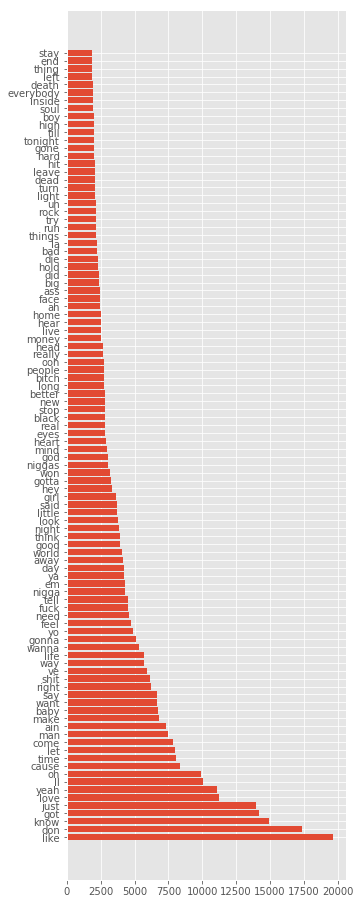

In [15]:
words_freq_df = words_freq_df.sort_values(by = 'freq', ascending = False).iloc[0:100, :]

plt.figure(figsize=(5, 16))
plt.barh(words_freq_df['words'], words_freq_df['freq']);

-----------

## Sobre N-Grams

Un n-grama es una 'frase' compuesta por n palabras, por ejemplo:

> * "Hola" es un 1-grama.
> * "Hola mundo" es un 2-grama.
> * "Hell yeah baby" es un 3-grama.

Revisar la ocurrencia de palabras en un documento de forma independiente de las demás palabras del documento implica asumir que la ocurrencia de palabras en el documento es independiente entre palabras, lo cual difícilmente se cumple pues cuando concatenamos palabras en una frase lo hacemos para poder representar un determinado concepto. **Es la frase completa la que lleva la carga semántica del concepto, no cada palabra por separado**, una análogía sería: No es lo mismo comer las partes que componen una hamburguesa por separado que comerlas juntas.


Podemos especificarle a `CountVecorizer` que utilice un rango de n-gramas a la hora de crear el **diccionario** de palabras.

```python
CountVectorizer(..., ngram_range= (1,4))
```
El código anterior le está indicando que busque n-gramas de largo 1,2,3 y 4. Por lo general hasta n-gramas de largo 4 basta pues al parecer en los lenguajes comúnes la carga semántica sigue estando de cierta forma modularizada dentro de la frase.

> **OJO:** Aumentar el largo de los n-gramas aceptados implica un aumento considerable de la cantidad de palabras en el diccionario, lo que implica que la cantidad de columnas en la matriz de ocurrencias es mayor $-->$ **Maldición de la dimensionaldiad**.


---------

Un ejemplo de la firma de la función pedida sería:

```python
def word_count_by_genre(descriptor = CountVectorizer(stopwords = 'english', ngra_range = (1,2), df = df_lyrics,
                                                    target = 'Lyrics', genre = 'hiphop'), sort_n = 100)
```

In [27]:
def word_count_by_genre(descriptor = CountVectorizer(stop_words = 'english', ngram_range = (1,2)), df = df_lyrics,
                                                    target = 'Lyrics', genre = 'hiphop', sort_n = 100):
    temp_fit_transform = descriptor.fit_transform(df[df['Genre'] == genre][target])
    temp_words = descriptor.get_feature_names()
    temp_freqs = temp_fit_transform.toarray().sum(axis = 0)
    temp_df = pd.DataFrame([list(temp_words),
                           list(temp_freqs)]).T
    temp_df.columns = ['words', 'freq']
    temp_df = temp_df.sort_values(by = 'freq', ascending = False).iloc[0:sort_n, :]
#    plt.figure(figsize=(5, 16))
    plt.title('Genre: '+genre, fontsize = 15)
    plt.barh(temp_df['words'], temp_df['freq'])

In [28]:
#plt.figure(figsize=(5, 16))
#word_count_by_genre()

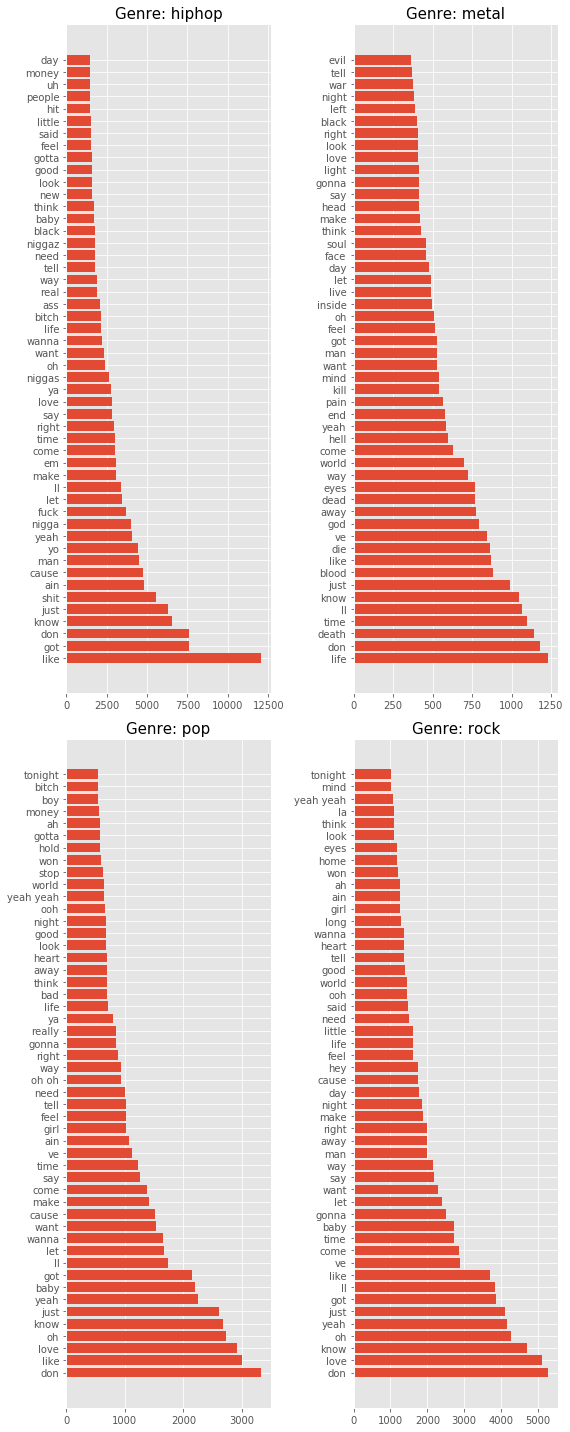

In [29]:
plt.figure(figsize=(8, 20))
for index, gen in enumerate(df_lyrics['Genre'].unique()):
    plt.subplot(2, 2, index + 1)
    word_count_by_genre(genre=gen, sort_n=50)
    plt.tight_layout()

# Ejercicio 4


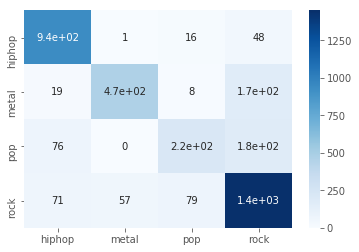

In [12]:
x_train, x_test, y_train, y_test = train_test_split(df_lyrics['Lyrics'],
                                                    df_lyrics['Genre'],
                                                    test_size = .40,
                                                   random_state = 11235813)

clf_pipe = Pipeline([('descriptor', CountVectorizer(ngram_range=(1,2))),
                      ('clf', MultinomialNB(alpha = 0.1))])

clf_pipe.fit(x_train, y_train)

y_preds = clf_pipe.predict(x_test)

genres = df_lyrics['Genre'].unique()

conf_mat = confusion_matrix(y_test, y_preds)

sn.heatmap(conf_mat, cmap='Blues', annot = True,
          xticklabels=genres,
          yticklabels = genres)

In [13]:
descriptor_text = CountVectorizer().fit_transform(x_train)
bayes = MultinomialNB().fit(descriptor_text,y_train)

```python
to_predict = ['I got a place in the underworld', # Brody Dalle - Underworld
'As veils of ignorance, hatred retains Storm of arrows through karma Seeking
light through samsara', # Gorguts - Forgotten Arrows
"Bye bye Don't want to be a fool for you Just another player in your game for
two You may hate me but it ain't no lie", # N'SYNC - Bye Bye Bye
'Move bitch, get out the way Get out the way bitch, get out the way Move
bitch, get out the way Get out the way bitch, get out the way', # Ludacris -
Move B*tch
'Sexual violence doesn’t start and end with rape It starts in our books and
behind our school gates' # IDLES - Mother,
"Take it from the girl you claimed to love You gonna get some bad karma I'm
the one who had to learn to \
build a heart made of armor From the girl who made you soup and tied your
shoes when you were hurting\
You are not deserving, you are not deserving" #Banks -
Drowning
]
```

In [31]:
to_predict = ['I got a place in the underworld', # Brody Dalle - Underworld
'As veils of ignorance, hatred retains Storm of arrows through karma Seeking light through samsara', # Gorguts - Forgotten Arrows
"Bye bye Don't want to be a fool for you Just another player in your game for two You may hate me but it ain't no lie", # N'SYNC - Bye Bye Bye
'Move bitch, get out the way Get out the way bitch, get out the way Move bitch, get out the way Get out the way bitch, get out the way', # Ludacris - Move B*tch
'Sexual violence doesn’t start and end with rape It starts in our books and behind our school gates' # IDLES - Mother,
"Take it from the girl you claimed to love You gonna get some bad karma I'm the one who had to learn to \
build a heart made of armor From the girl who made you soup and tied your shoes when you were hurting\
You are not deserving, you are not deserving" #Banks - Drowning
]
clf_pipe.predict(to_predict)

array(['rock', 'metal', 'pop', 'hiphop', 'rock'], dtype='<U6')

Metricas de Test

In [32]:
test_preds = clf_pipe.predict(x_test)

print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

      hiphop       0.85      0.94      0.89      1000
       metal       0.89      0.71      0.79       661
         pop       0.68      0.47      0.55       478
        rock       0.79      0.88      0.83      1657

   micro avg       0.81      0.81      0.81      3796
   macro avg       0.80      0.75      0.77      3796
weighted avg       0.81      0.81      0.80      3796



In [23]:
from sklearn.linear_model import LogisticRegression

descriptor = CountVectorizer().fit(x_train)
data_train = descriptor.transform(x_train)
lgr = LogisticRegression().fit(data_train, y_train)

/Users/ignacio/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/ignacio/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [25]:
data_test = descriptor.transform(x_test)
lgr_preds = lgr.predict(data_test)
print(classification_report(y_test, lgr_preds))

              precision    recall  f1-score   support

      hiphop       0.89      0.88      0.89      1000
       metal       0.76      0.73      0.75       661
         pop       0.63      0.55      0.59       478
        rock       0.78      0.83      0.80      1657

   micro avg       0.79      0.79      0.79      3796
   macro avg       0.77      0.75      0.76      3796
weighted avg       0.79      0.79      0.79      3796

